# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint
import time

# Import API key
from api_keys import weather_api_key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [4]:
#Practicing the data retrieval with One city LONDON

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "London"
query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
response = requests.get(query_url).json()
pprint(response)

lat = response['coord']['lat']
temp = response['main']['temp']
city = response['name']
windspeed = response['wind']['speed']
cloudiness = response['clouds']['all']
humidity = response['main']['humidity']
max_temp = response['main']['temp_max']
lngitude = response['coord']['lon']
countrY = response['sys']['country']
DaTe = response['dt']

print("latitide: ", lat, "Tempe: ", temp, "City: ", city, "Windspeed: ", windspeed, "Cloudiness: ", cloudiness, "Humidity: ", humidity, "Max temp: ", max_temp, "Longitude: ", lngitude, "Country: ", countrY, "Date: ", DaTe)

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1580263119,
 'id': 2643743,
 'main': {'feels_like': 26.98,
          'humidity': 67,
          'pressure': 1004,
          'temp': 37,
          'temp_max': 39.2,
          'temp_min': 35.01},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1580283854,
         'sunset': 1580316158,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 10.29}}
latitide:  51.51 Tempe:  37 City:  London Windspeed:  10.29 Cloudiness:  68 Humidity:  67 Max temp:  39.2 Longitude:  -0.13 Country:  GB Date:  1580263119


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
loop = ["marsa matruh", "timizart", "akola", "shingu", "pedana", "antalaha", "jaguarao", "mende", "khuzhir"]
    
cloudinessList = []
humidityList = []
cityList = []
LatList = []
tempList = []
windSpeedList = []
max_tempList = []
countryList = []
dateList = []
LongList = []
print ("Beginning the Data Retrieval")
print ('-'*50)
for citi in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q={citi}"
        response = requests.get(query_url).json()
        cloudinessList.append(response['clouds']['all'])
        windSpeedList.append(response['wind']['speed'])
        humidityList.append(response['main']['humidity'])
        cityList.append(response['name'])
        LatList.append(response['coord']['lat'])
        tempList.append(response['main']['temp'])
        max_tempList.append(response['main']['temp_max'])
        countryList.append(response['sys']['country'])
        dateList.append(response['dt'])
        LongList.append(response['coord']['lon'])
        print("Processing data from city", " | ", citi)
    except:
        print(citi, " not found. Skipping...")
        pass
print ('-'*50)
print ("Data Retrieval Complete")

Beginning the Data Retrieval
--------------------------------------------------
Processing data from city  |  lalmohan
Processing data from city  |  pochutla
Processing data from city  |  mataura
vaitupu  not found. Skipping...
Processing data from city  |  thompson
Processing data from city  |  severo-kurilsk
Processing data from city  |  bintulu
Processing data from city  |  rikitea
Processing data from city  |  tuktoyaktuk
Processing data from city  |  hilo
belushya guba  not found. Skipping...
Processing data from city  |  port alfred
Processing data from city  |  storforshei
Processing data from city  |  mount gambier
Processing data from city  |  atuona
Processing data from city  |  talara
Processing data from city  |  tasiilaq
Processing data from city  |  kharakvasla
barbar  not found. Skipping...
Processing data from city  |  ulaangom
Processing data from city  |  baruun-urt
Processing data from city  |  avarua
Processing data from city  |  bluff
Processing data from city  |  

Processing data from city  |  basco
Processing data from city  |  mgandu
Processing data from city  |  hundested
Processing data from city  |  chiredzi
Processing data from city  |  kavaratti
Processing data from city  |  biak
Processing data from city  |  sur
Processing data from city  |  ciudad bolivar
Processing data from city  |  brookhaven
Processing data from city  |  vaitape
kuche  not found. Skipping...
Processing data from city  |  cap malheureux
ruatoria  not found. Skipping...
makung  not found. Skipping...
Processing data from city  |  walvis bay
Processing data from city  |  saskylakh
Processing data from city  |  port blair
Processing data from city  |  mont-de-marsan
Processing data from city  |  huarmey
Processing data from city  |  goderich
Processing data from city  |  sao domingos
Processing data from city  |  airai
Processing data from city  |  north bend
Processing data from city  |  hasaki
Processing data from city  |  tiksi
marv dasht  not found. Skipping...
Proc

fort saint john  not found. Skipping...
Processing data from city  |  bonavista
Processing data from city  |  midland
Processing data from city  |  bar harbor
Processing data from city  |  newport
Processing data from city  |  dabat
Processing data from city  |  bekobod
Processing data from city  |  kendari
Processing data from city  |  pijijiapan
Processing data from city  |  wanning
Processing data from city  |  puerto narino
Processing data from city  |  lucea
Processing data from city  |  dhidhdhoo
Processing data from city  |  kanalion
Processing data from city  |  port shepstone
Processing data from city  |  nioro
Processing data from city  |  kavieng
Processing data from city  |  gari
Processing data from city  |  metu
Processing data from city  |  severomuysk
Processing data from city  |  rundu
Processing data from city  |  waddan
dinsor  not found. Skipping...
Processing data from city  |  santo antonio do ica
Processing data from city  |  bubaque
Processing data from city  | 

In [8]:
citiIndex = []
for index, city in np.ndenumerate(cityList):
    citiIndex.append(index[0])

new_dateList = []
for date in dateList:
        date = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(date))
        new_dateList.append(date)

In [9]:
#Making sure each column has the same length for building the dataframe
print ("City ID: ", len(citiIndex))
print ("City List: ", len(cityList))
print ("Cloudiness: ", len(cloudinessList))
print ("Country: ", len(countryList))
print ("Date: ", len(new_dateList))
print ("Humidity: ", len(humidityList))
print ("Latitudes: ", len(LatList))
print ("Longitude: ", len(LongList))
print ("Max Temperatures:", len(max_tempList))
print ("Wind Speed: ", len(windSpeedList))


City ID:  570
City List:  570
Cloudiness:  570
Country:  570
Date:  570
Humidity:  570
Latitudes:  570
Longitude:  570
Max Temperatures: 570
Wind Speed:  570


In [10]:
citi_df = pd.DataFrame({"City_ID": citiIndex, "City": cityList, "Cloudiness": cloudinessList, "Country": countryList, "Date": new_dateList, "Humidity": humidityList, "Lat": LatList, "Lng": LongList, "Max Temp": max_tempList, "Wind Speed": windSpeedList})
citi_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Lalmohan,74,BD,2020-01-28 23:18:02,56,22.34,90.74,71.31,3.09
1,1,Pochutla,20,MX,2020-01-28 23:18:03,74,15.74,-96.47,78.80,11.39
2,2,Mataura,96,NZ,2020-01-28 23:18:03,89,-46.19,168.86,55.00,11.99
3,3,Thompson,90,CA,2020-01-28 23:15:49,85,55.74,-97.86,10.40,5.82
4,4,Severo-Kuril'sk,100,RU,2020-01-28 23:18:03,85,50.68,156.12,25.90,3.33


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
citi_df.to_csv(r'cities.csv', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

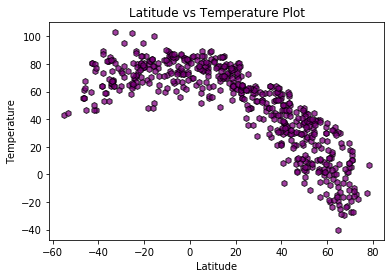

In [13]:
x_values = LatList
y_values = max_tempList
fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values, marker="h", facecolors="purple", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Plot-1-Latitude-Vs-Temperature.jpg")

#### Latitude vs. Humidity Plot

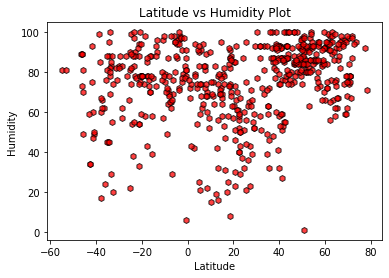

In [14]:
x_values = LatList
y_values = humidityList
fig2, ax2 = plt.subplots()
plt.scatter(x_values, y_values, marker="h", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Plot-2-Latitude-Vs-Humidity.jpg")

#### Latitude vs. Cloudiness Plot

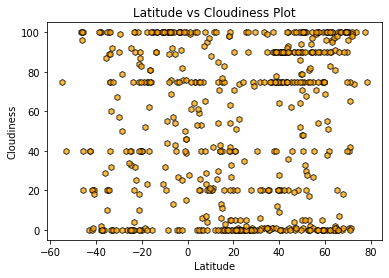

In [15]:
x_values = LatList
y_values = cloudinessList
fig3, ax3 = plt.subplots()
plt.scatter(x_values, y_values, marker="h", facecolors="orange", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Plot-3-Latitude-Vs-Cloudiness.jpg")

#### Latitude vs. Wind Speed Plot

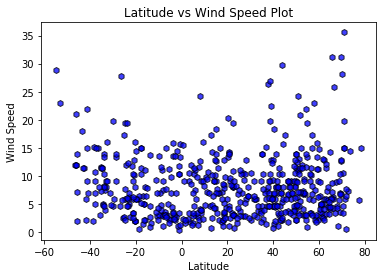

In [16]:
x_values = LatList
y_values = windSpeedList
fig4, ax4 = plt.subplots()
plt.scatter(x_values, y_values, marker="h", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Plot-4-Latitude-Vs-WindSpeed.jpg")

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearRegressionPlots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames
north_df = citi_df.loc[citi_df['Lat']>0]
south_df = citi_df.loc[citi_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

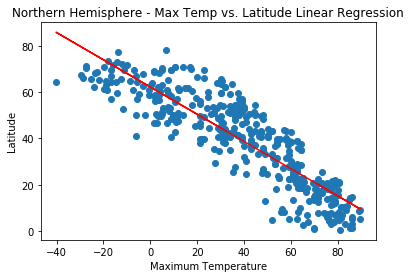

<Figure size 432x216 with 0 Axes>

In [29]:
x_values = north_df['Max Temp']
y_values = north_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig5, ax5 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.figure(figsize=(6,3))
plt.savefig("Plot-5-NH-MaxTemp-Vs-Latitude-LinearRegression.jpg")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

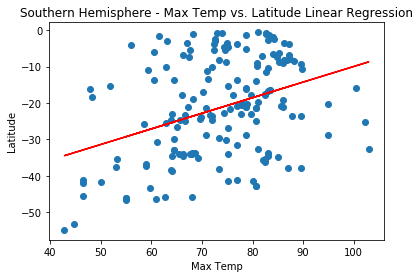

<Figure size 432x216 with 0 Axes>

In [30]:
x_values = south_df['Max Temp']
y_values = south_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig6, ax6 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.figure(figsize=(6,3))
plt.savefig("Plot-6-SH-MaxTemp-Vs-Latitude-LinearRegression.jpg")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

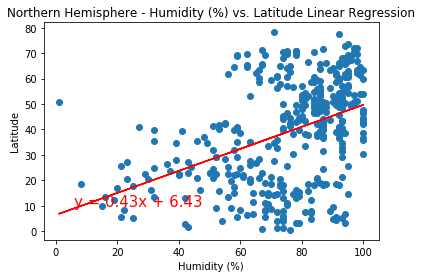

In [23]:
x_values = north_df['Humidity']
y_values = north_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig7, ax7 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("Plot-7-NH-Humidity-Vs-Latitude-LinearRegression.jpg")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

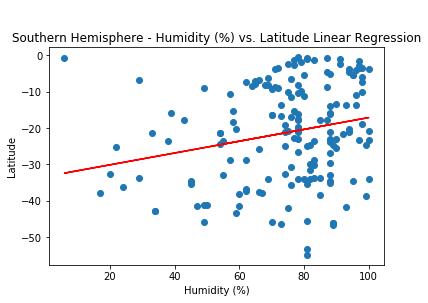

In [24]:
x_values = south_df['Humidity']
y_values = south_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig8, ax8 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("Plot-8-SH-Humidity-Vs-Latitude-LinearRegression.jpg")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

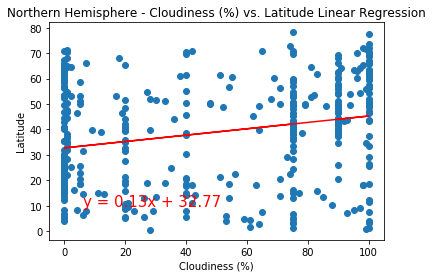

In [25]:
x_values = north_df['Cloudiness']
y_values = north_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig9, ax9 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("Plot-9-NH-Cloudiness-Vs-Latitude-LinearRegression.jpg")


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

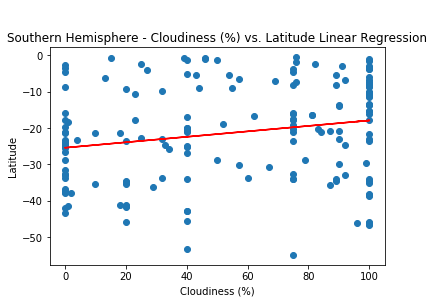

In [26]:
x_values = south_df['Cloudiness']
y_values = south_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig10, ax10 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("Plot-10-SH-Cloudiness-Vs-Latitude-LinearRegression.jpg")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

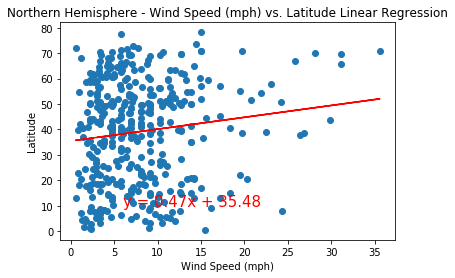

In [27]:
x_values = north_df['Wind Speed']
y_values = north_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig11, ax11 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("Plot-11-NH-WindSpeed-Vs-Latitude-LinearRegression.jpg")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

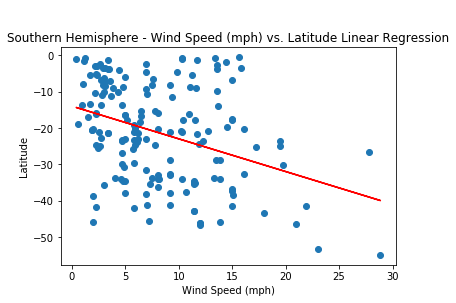

In [28]:
x_values = south_df['Wind Speed']
y_values = south_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig12, ax12 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("Plot-12-SH-WindSpeed-Vs-Latitude-LinearRegression.jpg")
plt.show()